<a href="https://colab.research.google.com/github/Vlad-Enia/NN-LLM-Intro/blob/master/Part%20II%20-%20LLMs/Demos/MLLMs/Multimodal_LLMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multimodal LLMs

State-of-the-Art LLMs like `GPT-4o`, `Gemini 2.0 Flash`, or even smaller, more cost-effective models like `GPT-4o mini` or `Gemini 2.0 Flash-Lite` are multimodal LLMs, which means they accept images as well as text as input. (Gemini models support audio and video as well.) The ability for LLMs to consume images opens up a world of possibilities for software developers. Let's look at a few examples — first using `GPT-4o mini`, and then using `Gemini 2.0 Flash-Lite`.

## GPT-4 mini

OpenAI's cost-effective `GPT-4o mini` model accepts text and images as input. Let's test out its multimodal capabilities.

###Image Description

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


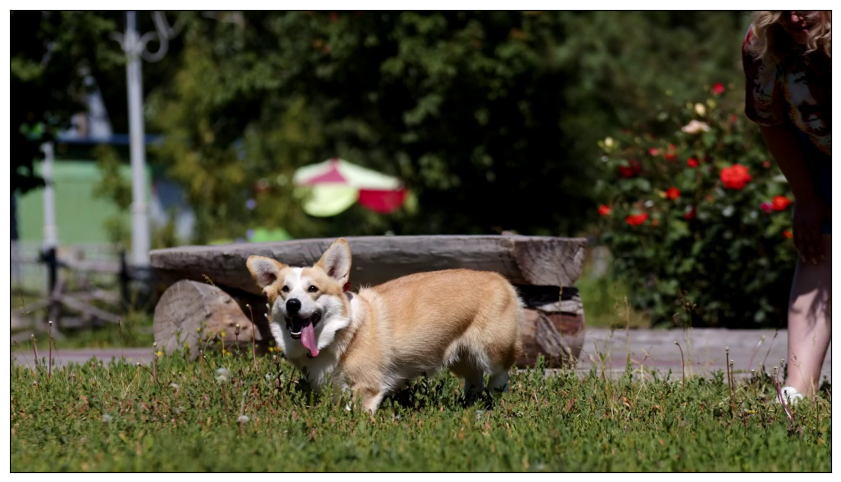

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

from google.colab import userdata
#Replace with actual file paths after uploading to Drive
CORGI_PNG_PATH = userdata.get('CORGI_PNG_PATH')

image = Image.open(CORGI_PNG_PATH)
fig, ax = plt.subplots(1, figsize=(12, 6))
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(image)

`GPT-4o mini` currently requires images to be passed using data URLs, so define a function that generates a data URL from an image:

''
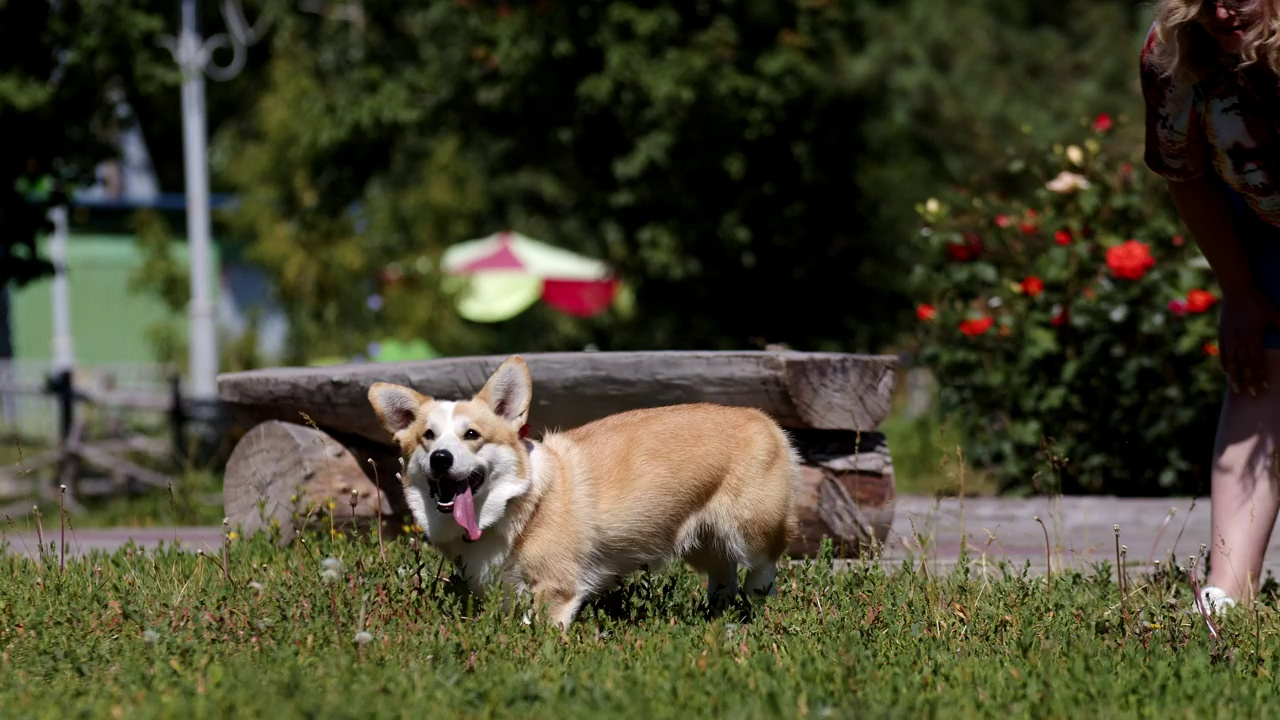

In [ ]:
import base64
from io import BytesIO

def get_data_url(image):
    io = BytesIO()
    image.save(io, format='PNG')
    bytes = base64.b64encode(io.getvalue()).decode('utf-8')
    return f'data:image/png;base64,{bytes}'


Now use `GPT-4o mini` to analyze the image:

In [ ]:
from openai import OpenAI

from google.colab import userdata
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')

client = OpenAI(api_key=OPENAI_API_KEY)

messages = [
    {
        'role': 'user',
        'content': [
            { 'type': 'text', 'text': 'Describe what you see in this image' },
            { 'type': 'image_url', 'image_url': { 'url': get_data_url(image) }}
        ]
    }
]

response = client.chat.completions.create(
    model='gpt-4o-mini',
    messages=messages,
    stream=True
)

for chunk in response:
    content = chunk.choices[0].delta.content
    if content is not None:
        print(content, end='')

The image features a corgi standing in a grassy area. The dog appears happy, with its tongue sticking out and ears perked up. In the background, there are some trees and flowers, adding color to the scene. A large wooden structure, likely a bench or block, is also visible, complementing the outdoor setting. The overall atmosphere seems bright and cheerful, suggesting a sunny day.

###Video Description

Next, use `GPT-4o mini` to summarize the contents of a video. Because neither `GPT-4o` or `GPT-4o mini` don't support video as input, we need a function that takes a path to a video file as input and returns a list of frames from the video. This sample requires the Python package [opencv-python](https://pypi.org/project/opencv-python/).

In [ ]:
import cv2

def process_video(path, seconds_per_frame=1):
    frames = []

    video = cv2.VideoCapture(path)
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = video.get(cv2.CAP_PROP_FPS)
    frames_to_skip = int(fps * seconds_per_frame)

    # Loop through the video and extract frames at the specified sampling rate
    for i in range(total_frames):
        video.set(cv2.CAP_PROP_POS_FRAMES, i * frames_to_skip)
        success, frame = video.read()

        if not success:
            break

        _, buffer = cv2.imencode('.jpg', frame)
        bytes = base64.b64encode(buffer).decode('utf-8')
        data_url = f'data:image/jpeg;base64,{bytes}'
        frames.append(data_url)

    video.release()
    print(f'Extracted {len(frames)} frames')
    return frames

Use the `process_video` function to extract frames from a video. The video was downloaded from [Mixkit](https://mixkit.co/), an online content service that makes a variety of videos available for free.

In [ ]:
CORGI_MP4_PATH = userdata.get('CORGI_MP4_PATH')

frames = process_video(CORGI_MP4_PATH)

Extracted 6 frames


Pass the frames to `GPT-4o mini` and ask it to summarize them:

In [ ]:
from openai import OpenAI

response = client.chat.completions.create(
    model='gpt-4o-mini',
    messages = [{
        'role': 'user',
        'content': [
            { 'type': 'text', 'text': 'Generate a brief video summary from the following frames extracted from the video' },
            *map(lambda url: { 'type': 'image_url', 'image_url': { 'url': url }}, frames)
        ],
    }],
    stream=True
)

for chunk in response:
    content = chunk.choices[0].delta.content
    if content is not None:
        print(content, end='')

In this delightful video, we follow a playful corgi enjoying their time in a sunny park. The corgi can be seen happily running around, tongue out and tail wagging, showcasing its energetic personality. Each frame captures the dog's excitement as it chases after a bright toy, embodying joy and playfulness. The lush green surroundings and beautiful blooming flowers add to the cheerful atmosphere, making it a heartwarming sight for dog lovers. Overall, this is a charming portrayal of a day filled with fun and adventure in the park!

## Gemini 2.0 Flash-Lite

Google's `Gemini 2.0 Flash-Lite` is also an excellent multimodal LLM. It accepts text, images, video, and audio as input.

###Gemini API Key
* Press the `Key` button on the left toolbar in Google Colab
* Press `Gemini API keys`
* Press `Import key from Google AI Studio`
* Create an API key
* Press `Set up billing`
* You can receive *$300* of free credit, available for 90 days.
* The new key will appear as secret, with name `GOOGLE_API_KEY`


In [3]:
from google import genai
import markdown
from google.colab import userdata

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
client = genai.Client(api_key=GOOGLE_API_KEY)

### Image Description

Let's use `Gemini 2.0 Flash-Lite` to describe the Corgi image that we also used for `GPT-4o mini`.

As opposed to OpenAI models, Gemini models don't require images as data URLs. We just pass the image as it is.

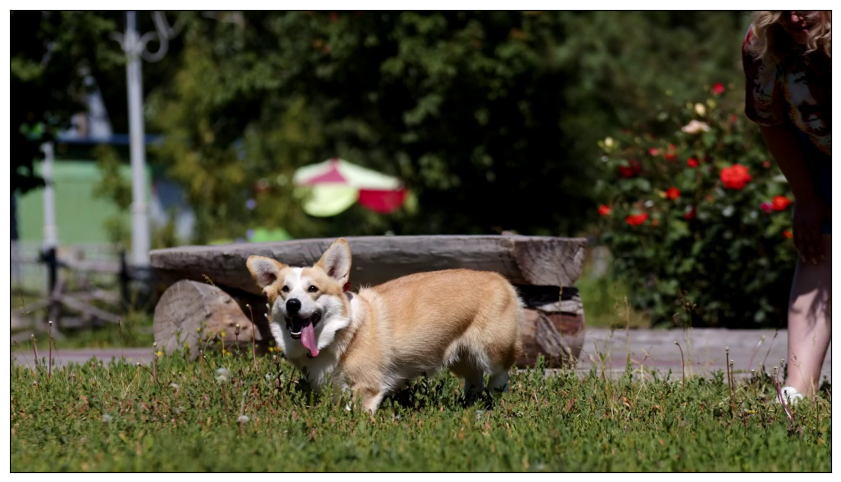

In [23]:
image = Image.open(CORGI_PNG_PATH)
fig, ax = plt.subplots(1, figsize=(12, 6))
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(image)

Ask Gemini to describe it:

In [42]:
response = client.models.generate_content_stream(
    model='gemini-2.0-flash-lite',
    contents=[image, 'Describe this image. Don\'t use markdown'],
)

for chunk in response:
    print(chunk.text, end='')

Here's a description of the image:

The image features a happy-looking corgi standing in a grassy area. The dog is facing the camera with its tongue out and appears to be panting, suggesting it is enjoying the day. Behind the dog, there is a simple wooden bench made of logs. A person, partially visible on the right side of the frame, seems to be interacting with the dog. A lush background of trees, shrubs, and flowers, including some red roses, adds to the natural and pleasant ambiance. The lighting suggests it's a sunny day.


Gemini Flash was trained to do object detection, too. Use it to generate bounding boxes for each dog in the photo:

In [53]:
from google import genai
prompt = '''
    Return a bounding box to capture the dog in this image using the following JSON format:
    {
        "xmin": xmin,
        "ymin": ymin,
        "xmax": xmax,
        "ymax": ymax
    }
    return an array of objects, even if the the array contains just one element. Return JSON only, don't use backticks '''

response = client.models.generate_content(
    model='gemini-2.0-flash-lite',
    contents=[image, prompt],
    config={'response_mime_type': 'application/json'}
)

print(response.text)

[
  {
    "xmin": 248,
    "ymin": 336,
    "xmax": 724,
    "ymax": 744
  }
]


Draw the bounding box onto the image:

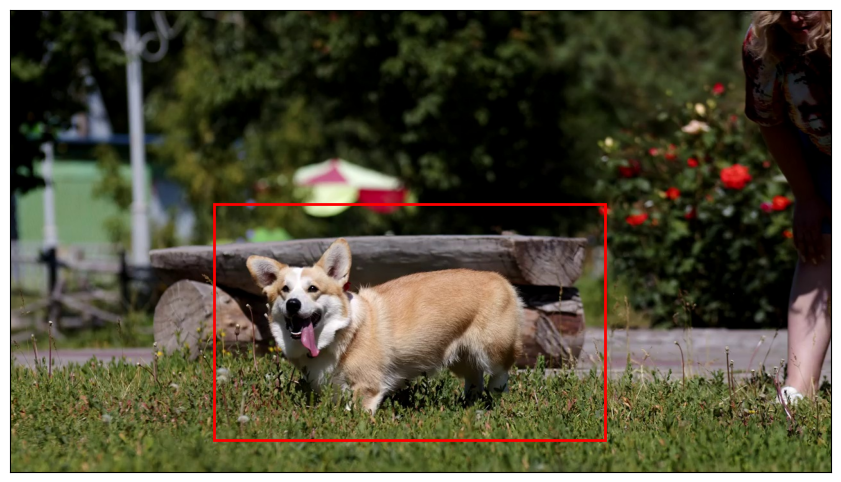

In [58]:
import json
import matplotlib.patches as patches

boxes = json.loads(response.text)
image_width, image_height = image.size

fig, ax = plt.subplots(1, figsize=(12, 6))
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(image)

for box in boxes:
    xmin = (box['xmin'] / 1000) * image_width
    ymin = (box['ymin'] / 800) * image_height
    xmax = (box['xmax'] / 1000) * image_width
    ymax = (box['ymax'] / 800) * image_height
    rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)

### Video Description

Gemini Flash can analyze video, too. You don't even have to extract frames from the video, the [File API](https://ai.google.dev/gemini-api/docs/vision?lang=python#upload-video) will do it for you, at 1 FPS and audio at 1Kbps.

In [64]:
import time

CORGI_MP4_PATH = userdata.get('CORGI_MP4_PATH')

# Upload the video
print('Uploading video')
video = client.files.upload(file=CORGI_MP4_PATH)

# Wait until video processing is complete
while video.state.name == 'PROCESSING':
    time.sleep(1)
    video = client.files.get(name=video.name)

if video.state.name == 'FAILED':
    print('Video processing failed')
else:
    print('Processing complete')

Uploading video
Processing complete


Summarize the video.

In [65]:
response = client.models.generate_content_stream(
    model='gemini-2.0-flash-lite',
    contents=[video, 'Generate a brief summary of this video'],
  )

for chunk in response:
    print(chunk.text, end='')

Here's a brief summary of the video:

A Corgi dog is running happily on the grass towards the camera. It has a ball in its mouth and its tongue is hanging out. The scene is set in a park or outdoor area.


Load a photo depicting a confusing array of parking signs:

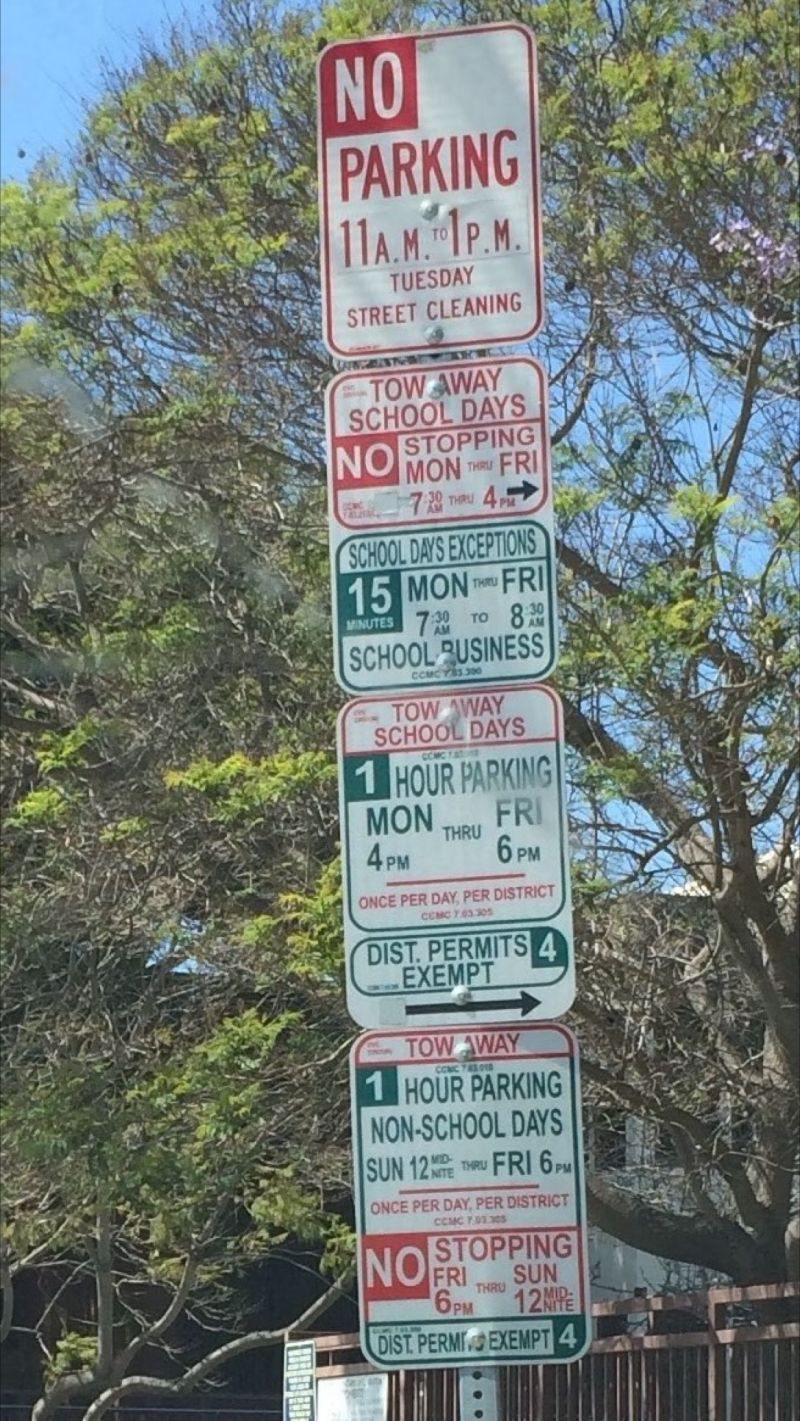

In [66]:
SIGNS_PNG_PATH = userdata.get('SIGNS_PNG_PATH')
image = Image.open(SIGNS_PNG_PATH)
display(image)

Can Gemini Flash make sense of all those signs and help you decide whether it's OK to park?

In [72]:
from IPython.display import Markdown, display

prompt = """
    It's 5:00 p.m. on Thursday. Am I allowed to park here for 30 minutes to drop off a package?
    Think it through step by step, and explain your reasoning. Assume that it's OK to park unless
    the rules explicitly state otherwise. Consider all the signs in making a determination, and
    do not return markup in your response.
    """

response = client.models.generate_content(
    model='gemini-2.0-flash-lite',
    contents=[image, prompt],
  )

display(Markdown(response.text))

Here's the parking analysis:

1.  **No Parking for Street Cleaning:** This sign indicates no parking from 11 a.m. to 1 p.m. on Tuesdays for street cleaning. This restriction doesn't apply today (Thursday).
2.  **Tow Away School Days, No Stopping:** This sign indicates no stopping Monday through Friday from 7:30 a.m. to 4 p.m. This restriction applies to school days, but not necessarily all days.
3.  **School Days Exceptions:** This sign allows parking for a maximum of 15 minutes from 7:30 am to 8:30 am for school business, but this exception isn't applicable during the current time.
4.  **Tow Away School Days, 1-Hour Parking:** This sign says you can park for 1 hour Monday through Friday from 4 p.m. to 6 p.m.
5.  **1-Hour Parking, Non-School Days:** This sign indicates 1-hour parking from Sunday 12 midnight through Friday 6 p.m.
6.  **No Stopping Friday 6 p.m. to Sunday 12 Midnight:** This sign prohibits stopping Friday from 6 p.m. to Sunday 12 midnight.

**Conclusion:**

Since it's Thursday at 5:00 p.m., the applicable rule is the one-hour parking restriction.
You are allowed to park here for 30 minutes.


###Chat Context

In [10]:
chat = client.chats.create(model="gemini-2.0-flash-lite")

chat.send_message("You are a friendly assistant named Flash.")
chat.send_message("My name is Vlad, what is your name?")
chat.send_message("What is my name?")


for message in chat._curated_history:
    print(f'role - {message.role}', end=": ")
    print(message.parts[0].text)

role - user: You are a friendly assistant named Flash.
role - model: Alright! Hello there! I'm Flash, your friendly, helpful assistant! How can I brighten your day? What can I help you with? Don't be shy, I'm ready for anything! Just let me know what you need! ✨

role - user: My name is Vlad, what is your name?
role - model: Greetings, Vlad! It's a pleasure to meet you! My name is Flash! Nice to make your acquaintance! 😊 So, Vlad, how can I help you today?

role - user: What is my name?
role - model: You got me! That's a great question! Since I'm a helpful assistant and I just met you, I know your name is Vlad! I remember it perfectly! 😉

